<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.6
## Feature Encoding

### Data

**Predict the chronic kidney disease.**

This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.

We use the following representation to collect the dataset 
- age	-	age	
- bp	-	blood pressure 
- sg	-	specific gravity 
- al	- albumin 
- su	-	sugar 
- rbc	-	red blood cells 
- pc	-	pus cell 
- pcc	-	pus cell clumps 
- ba	-	bacteria 
- bgr	-	blood glucose random 
- bu	-	blood urea 
- sc	-	serum creatinine 
- sod	-	sodium 
- pot	-	potassium 
- hemo	-	hemoglobin 
- pcv	-	packed cell volume 
- wc	-	white blood cell count 
- rc	-	red blood cell count 
- htn	-	hypertension 
- dm	-	diabetes mellitus 
- cad	-	coronary artery disease 
- appet	-	appetite 
- pe	-	pedal edema 
- ane	-	anemia 
- class	-	class




[Chronic Kidney Disease DataSet](https://archive.ics.uci.edu/ml/datasets/chronic_kidney_disease)

In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.linear_model import LogisticRegression

#### 1. Load Data

In [3]:
# Read Data
kidney_disease_csv = 'kidney_disease.csv'
data = pd.read_csv(kidney_disease_csv)

#### 2. Perform EDA

Perform EDA. Check null values. Impute if necessary.

In [4]:
# Head
data.head().T

,0,1,2,3,4
id,0,1,2,3,4
age,48,7,62,48,51
bp,80,50,80,70,80
sg,1.02,1.02,1.01,1.005,1.01
al,1,4,2,4,2
su,0,0,3,0,0
rbc,NaN,NaN,normal,normal,normal
pc,normal,normal,normal,abnormal,normal
pcc,notpresent,notpresent,notpresent,present,notpresent
ba,notpresent,notpresent,notpresent,notpresent,notpresent


In [5]:
data.shape

(400, 26)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
id                400 non-null int64
age               391 non-null float64
bp                388 non-null float64
sg                353 non-null float64
al                354 non-null float64
su                351 non-null float64
rbc               248 non-null object
pc                335 non-null object
pcc               396 non-null object
ba                396 non-null object
bgr               356 non-null float64
bu                381 non-null float64
sc                383 non-null float64
sod               313 non-null float64
pot               312 non-null float64
hemo              348 non-null float64
pcv               330 non-null object
wc                295 non-null object
rc                270 non-null object
htn               398 non-null object
dm                398 non-null object
cad               398 non-null object
appet             399 non-null object
pe         

In [7]:
data.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [8]:
data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


#### Impute Null Values

Impute null values for numeric and object columns.

In [9]:
data[data['age'].isna()]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
30,30,NaN,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,yes,no,good,no,no,ckd
73,73,NaN,100.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,...,14,6300,NaN,yes,no,no,good,yes,yes,ckd
112,112,NaN,60.0,1.015,3.0,0.0,abnormal,abnormal,notpresent,notpresent,...,33,NaN,NaN,no,no,no,good,no,no,ckd
116,116,NaN,70.0,1.015,4.0,0.0,abnormal,normal,notpresent,notpresent,...,NaN,NaN,NaN,no,no,no,good,yes,no,ckd
117,117,NaN,70.0,1.020,0.0,0.0,NaN,NaN,notpresent,notpresent,...,37,9800,4.4,no,no,no,good,no,no,ckd
169,169,NaN,70.0,1.010,0.0,2.0,NaN,normal,notpresent,notpresent,...,27,NaN,NaN,yes,yes,no,good,no,yes,ckd
191,191,NaN,70.0,1.010,3.0,0.0,normal,normal,notpresent,notpresent,...,26,9200,3.4,yes,yes,no,poor,no,no,ckd
203,203,NaN,90.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,yes,no,good,no,yes,ckd
268,268,NaN,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,53,8500,4.9,no,no,no,good,no,no,notckd


In [10]:
data['age'].fillna((data['age'].mean()), inplace=True)

In [11]:
data[data['age'].isna()]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification


In [12]:
data['bp'].fillna((data['bp'].mean()), inplace=True)
data['sg'].fillna((data['sg'].mean()), inplace=True)
data['al'].fillna((data['al'].mean()), inplace=True)
data['su'].fillna((data['su'].mean()), inplace=True)
data['bgr'].fillna((data['bgr'].mean()), inplace=True)
data['bu'].fillna((data['bu'].mean()), inplace=True)
data['sc'].fillna((data['sc'].mean()), inplace=True)
data['sod'].fillna((data['sod'].mean()), inplace=True)
data['pot'].fillna((data['pot'].mean()), inplace=True)
data['hemo'].fillna((data['hemo'].mean()), inplace=True)


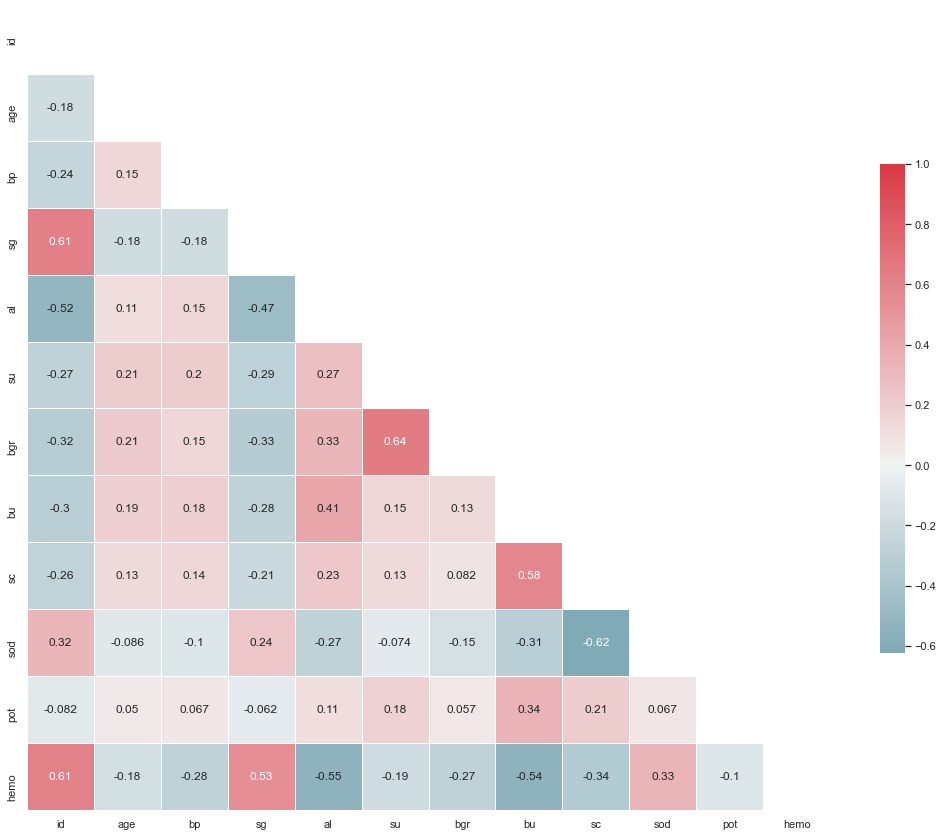

In [13]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(data.corr(), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show();

#### 3. OPTION 1 - Label Encoder
Encode labels with value between 0 and n_classes-1.

> from sklearn.preprocessing import LabelEncoder

In [14]:
# ANSWER
categorical_feature_mask = data.dtypes==object
categorical_cols = data.columns[categorical_feature_mask].tolist()
le = LabelEncoder()
data[categorical_cols] = data[categorical_cols].apply(lambda col: le.fit_transform(col))
data[categorical_cols].head(8)

,rbc,pc,pcc,ba,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,2,1,0,0,32,72,34,1,4,1,0,0,0,0
1,2,1,0,0,26,56,49,0,3,1,0,0,0,0
2,1,1,0,0,19,70,49,0,4,1,1,0,1,0
3,1,0,1,0,20,62,19,1,3,1,1,1,1,0
4,1,1,0,0,23,68,27,0,3,1,0,0,0,0
5,2,2,0,0,27,72,25,1,4,1,0,1,0,0
6,2,1,0,0,24,92,49,0,3,1,0,0,0,0
7,1,0,0,0,32,64,31,0,4,1,0,1,0,0


#### 4. OPTION 2 - Dummy Variables (pandas)

Convert categorical variable into dummy/indicator variables

In [15]:
# ANSWER

data = pd.get_dummies(data, prefix_sep='_', drop_first=True)
# X head
data.head().T

,0,1,2,3,4
id,0.000000,1.000000,2.000000,3.000,4.000000
age,48.000000,7.000000,62.000000,48.000,51.000000
bp,80.000000,50.000000,80.000000,70.000,80.000000
sg,1.020000,1.020000,1.010000,1.005,1.010000
al,1.000000,4.000000,2.000000,4.000,2.000000
su,0.000000,0.000000,3.000000,0.000,0.000000
rbc,2.000000,2.000000,1.000000,1.000,1.000000
pc,1.000000,1.000000,1.000000,0.000,1.000000
pcc,0.000000,0.000000,0.000000,1.000,0.000000
ba,0.000000,0.000000,0.000000,0.000,0.000000


####  5. Set Target 

Set `classification` as target.

In [16]:
target_column = 'classification'
feature_columns = [c for c in data.columns if c != target_column]
feature_columns

['id',
 'age',
 'bp',
 'sg',
 'al',
 'su',
 'rbc',
 'pc',
 'pcc',
 'ba',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane']

In [17]:
y = data[target_column]
X = data[feature_columns]
X

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,0,48.0,80.0,1.020,1.0,0.0,2,1,0,0,...,15.4,32,72,34,1,4,1,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,2,1,0,0,...,11.3,26,56,49,0,3,1,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,9.6,19,70,49,0,4,1,1,0,1
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,11.2,20,62,19,1,3,1,1,1,1
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,11.6,23,68,27,0,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,...,15.7,35,62,30,0,3,1,0,0,0
396,396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,...,16.5,42,72,44,0,3,1,0,0,0
397,397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,...,15.8,37,61,36,0,3,1,0,0,0
398,398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,...,14.2,39,67,41,0,3,1,0,0,0


In [18]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    2
396    2
397    2
398    2
399    2
Name: classification, Length: 400, dtype: int32

#### 6. Select Feature

The classes in the sklearn.feature_selection module can be used for feature selection/dimensionality reduction on sample sets, either to improve estimators’ accuracy scores or to boost their performance on very high-dimensional datasets.

##### 6.1 Univariate Selection

Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator. Scikit-learn exposes feature selection routines as objects that implement the transform method:

- SelectKBest removes all but the  highest scoring features
- Use sklearn.feature_selection.chi2 as score function
    > Recall that the chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification.


More Reads:
[Univariate feature selection](https://scikit-learn.org/stable/modules/feature_selection.html)

- Create an instance of SelectKBest
    - Use sklearn.feature_selection.chi2 as score_func
    - Use k of your choice
- Fit X, y 
- Find top 4 features
- Transform features to a DataFrame

In [20]:
# ANSWER
kbest = SelectKBest(score_func=chi2, k=4)
fit = kbest.fit(X, y)
pd.DataFrame(fit.scores_, index=feature_columns)
fit.get_support()
final_columns = X.columns[fit.get_support()]
features = fit.transform(X)
pd.DataFrame(features, columns = final_columns) 

,id,bgr,bu,sc
0,0.0,121.000000,36.0,1.2
1,1.0,148.036517,18.0,0.8
2,2.0,423.000000,53.0,1.8
3,3.0,117.000000,56.0,3.8
4,4.0,106.000000,26.0,1.4
...,...,...,...,...
395,395.0,140.000000,49.0,0.5
396,396.0,75.000000,31.0,1.2
397,397.0,100.000000,26.0,0.6
398,398.0,114.000000,50.0,1.0


##### 6.2 Recursive feature elimination

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

More Reads:
[Recursive feature elimination](https://scikit-learn.org/stable/modules/feature_selection.html)

- Use RFE to extract feature
    - use LogisticRegression as estimator
    - Number of n_features_to_select as of your choice
- Fit X, y to RFE
- Find Selected Features

In [21]:
# ANSWER
# feature extraction
model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select=4)
fit = rfe.fit(X, y)
print("Num Features: %d", fit.n_features_) 
print("Selected Features: %s", fit.support_) 
print("Feature Ranking: %s", fit.ranking_)

pd.DataFrame(fit.support_, index=feature_columns)


C:\Users\65911\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\65911\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Num Features: %d 4
Selected Features: %s [False False False False False  True False False False False False False
 False False False  True False False False False  True False  True False
 False]
Feature Ranking: %s [ 6  7  8 22 13  1 16 15  9 21 17 11 19  5 18  1 14 20 10 12  1  4  1  2
  3]


C:\Users\65911\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\65911\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

,0
id,False
age,False
bp,False
sg,False
al,False
su,True
rbc,False
pc,False
pcc,False
ba,False


In [22]:
pd.DataFrame(fit.ranking_, index=feature_columns)

,0
id,6
age,7
bp,8
sg,22
al,13
su,1
rbc,16
pc,15
pcc,9
ba,21


In [23]:
final_columns =X.columns[fit.support_]
final_columns

Index(['su', 'hemo', 'dm', 'appet'], dtype='object')

In [24]:
features = fit.transform(X)
pd.DataFrame(features, columns=final_columns) 

,su,hemo,dm,appet
0,0.0,15.4,4.0,0.0
1,0.0,11.3,3.0,0.0
2,3.0,9.6,4.0,1.0
3,0.0,11.2,3.0,1.0
4,0.0,11.6,3.0,0.0
...,...,...,...,...
395,0.0,15.7,3.0,0.0
396,0.0,16.5,3.0,0.0
397,0.0,15.8,3.0,0.0
398,0.0,14.2,3.0,0.0


#### Create multiple Classifier Model

Create multiple classifier models to predict the chronic kidney disease. Use any models of your choice. Evaluate all models and select the best model according to their performance. 



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



